# Import libs

In [2]:
import pandas as pd
import numpy as np
from knn.knn import knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Artificial I dataset

In [3]:
Xy = pd.read_csv('./datasets/artificial_I.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating model

In [4]:
knn_model = knn(k=3, type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [5]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)

    hit_rate_list.append(knn_model.score(X_test, y_test))

    y_pred = [knn_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [6]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.875, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0]

Accuracy:
0.975

Standard Deviation:
0.049999999999999996

Confusion Matrix:
[[7 0]
 [1 0]]
[[6 0]
 [0 2]]
[[8]]
[[5 0]
 [1 2]]
[[5 0]
 [0 3]]
[[7 0]
 [0 1]]
[[6 0]
 [0 2]]
[[6 0]
 [1 1]]
[[7 0]
 [0 1]]
[[5 0]
 [0 3]]
[[7 0]
 [0 1]]
[[7 0]
 [0 1]]
[[6 0]
 [0 2]]
[[8]]
[[6 0]
 [0 2]]
[[6 0]
 [1 1]]
[[6 0]
 [0 2]]
[[8]]
[[7 0]
 [0 1]]
[[6 0]
 [0 2]]


# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
           0         1
0  -1.140386 -8.717648
19 -1.110762 -9.927405
2  -9.227105 -1.114568
34 -1.393042  9.708829
30 -1.259743  8.628746
5  -9.671684 -8.706664
23 -1.005674 -5.921488
4  -1.220272 -1.167834
13 -7.598509 -1.218228
14 -7.068309 -7.793847
38 -8.835893  8.525853
11 -8.653664 -1.590602
10 -1.016304 -1.136139
17 -9.812746 -9.907555
1  -1.308985 -9.955081
3  -1.174314 -1.268157
28 -1.013931 -7.248398
31 -7.052803  1.061320
26 -1.130384 -1.095894
35 -1.151901  1.164810
8  -6.936184 -1.044386
21 -9.983516 -1.050897
32 -7.723384  1.277515
29 -9.300019 -1.237382
15 -1.123675 -1.063885
33 -1.051750  1.029824
12 -1.077934 -1.388849
6  -8.432448 -9.571845
20 -1.410935 -1.070251
36 -1.062510  7.481380
9  -1.399858 -1.108876
24 -1.086797 -1.070527
Test dataset:
           0         1
7  -1.220004 -9.135696
22 -1.051673 -1.211898
18 -1.048592 -9.708492
25 -6.346053 -8.586309
39 -1.013099  1.090899
27 -8.576933 -9.426238
16 -8.542154 -1.240448
37 -1.348579  8.142397


# Training the model with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting decision surface

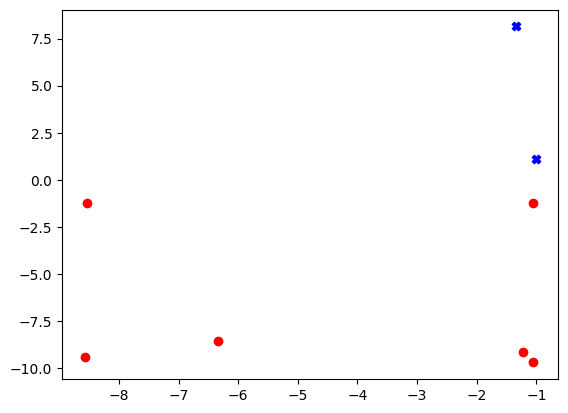

In [10]:
data = X_test_2d[:][:].values

y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

zero = np.where(y_pred == 0)
one = np.where(y_pred == 1)

plt.scatter(data[zero, 0], data[zero, 1],
            color='red', marker='o', label='zero')
plt.scatter(data[one, 0], data[one, 1],
            color='blue', marker='X', label='one')

plt.show()